In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

2023-12-04 21:42:43.054542: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 21:42:43.336373: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 21:42:43.336455: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 21:42:43.376901: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 21:42:43.445529: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 21:42:43.447824: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
X_train=np.loadtxt('input.csv',delimiter=',')
Y_train=np.loadtxt('labels.csv',delimiter=',')
X_test=np.loadtxt('input_test.csv',delimiter=',')
Y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [3]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2000, 30000)
(2000,)
(400, 30000)
(400,)


In [4]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)
X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)
X_train=X_train/255.0
X_test=X_test/255.0

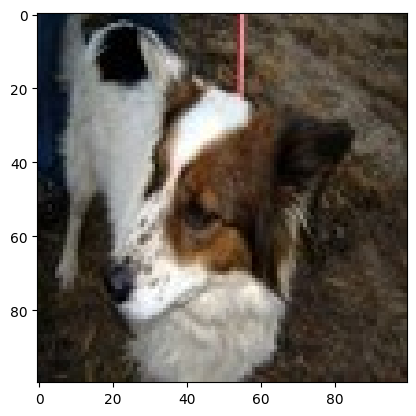

In [5]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [6]:
model=Sequential([
    Conv2D(32, (3,3), activation ='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense (64, activation = 'relu'),
    Dense (1, activation = 'sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=64)
model.evaluate(X_test,Y_test)

Epoch 1/5


2023-12-04 21:43:04.535968: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 240000000 exceeds 10% of free system memory.
2023-12-04 21:43:05.728738: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.
2023-12-04 21:43:05.914120: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.


 1/32 [..............................] - ETA: 39s - loss: 0.6965 - accuracy: 0.5156

2023-12-04 21:43:06.040869: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.
2023-12-04 21:43:06.204429: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.


32/32 [==============================] - 10s 279ms/step - loss: 0.7095 - accuracy: 0.5410
Epoch 2/5
32/32 [==============================] - 9s 282ms/step - loss: 0.6714 - accuracy: 0.5855
Epoch 3/5
32/32 [==============================] - 9s 279ms/step - loss: 0.6000 - accuracy: 0.6755
Epoch 4/5
32/32 [==============================] - 9s 282ms/step - loss: 0.5325 - accuracy: 0.7255
Epoch 5/5
13/13 [==============================] - 0s 27ms/step - loss: 0.6131 - accuracy: 0.6775


[0.6131452322006226, 0.6775000095367432]

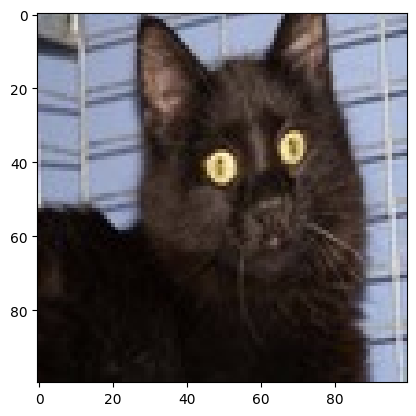

1/1 [==============================] - 0s 22ms/step
[[0.9641744]]
CAT


In [18]:
# Generate a random index within the valid range for X_test
idx2 = random.randint(0, len(X_test) - 1)

# Plot the image
plt.imshow(X_test[idx2, :])
plt.show()

# Make predictions using the model
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)

# Compare predictions and print the result
pred = y_pred > 0.5
if pred == 0:
    print('DOG')
else:
    print('CAT')